In [9]:
!pip install pandas gdown scikit-learn joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Although we drop NaNs, including this for best practice pipeline structure
import joblib
import pickle  # Added for .pkl saving
import os
import sys

# --- Configuration ---
PIPELINE_FILENAME_JOBLIB = 'aqi_prediction_pipeline.joblib'
PIPELINE_FILENAME_PKL = 'aqi_prediction_pipeline.pkl'
FEATURES_FILENAME_JOBLIB = 'aqi_model_features.joblib'
FEATURES_FILENAME_PKL = 'aqi_model_features.pkl'
RANDOM_STATE = 42

# --- Data Loading (from PC) ---

# Assuming the dataset is already on your PC as 'station_hours.csv' in the current directory
output = '/Users/mc/Desktop/FYP Updated/station_hours.csv'

try:
    station_hours = pd.read_csv(output)
    print("\nFile loaded successfully!")
    print(f"Initial number of rows: {len(station_hours)}")
except Exception as e:
    print(f"Error loading file: {e}")
    sys.exit(1)

print(f"\nstation_hours — shape: {station_hours.shape}")
print(station_hours.columns)

# --- Data Preparation and Cleaning ---

# Define features and target
features = ['PM2.5', 'PM10', 'SO2', 'O3', 'NO2', 'CO']
target = 'AQI'

# Drop rows where any required feature or the target is missing
data_clean = station_hours.dropna(subset=features + [target])

X = data_clean[features]
y = data_clean[target]

# --- Data Splitting ---

# Split data into training and validation/test sets (using all data for training, no sampling limit)
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE)

# Split the Val/Test Pool into Test and Validation
X_test, X_val, y_test, y_val = train_test_split(X_valtest, y_valtest, test_size=0.25, random_state=RANDOM_STATE)

print(f"Final X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_val shape: {X_val.shape}")

# --- Pipeline Definition and Training ---

print("\n--- Pipeline Definition and Training ---")
# Define the steps for the pipeline
# Step 1: Imputer (placeholder for handling missing values if needed in the future)
# Step 2: Random Forest Regressor with max_depth=20
aqi_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', RandomForestRegressor(n_estimators=9, max_depth=14, random_state=42, n_jobs=-1))
])

# Train the pipeline
print("Training the Pipeline...")

aqi_pipeline.fit(X_train, y_train)
print("Pipeline training complete.")

# --- Model Evaluation ---

# Evaluate on Test Set
y_pred_test = aqi_pipeline.predict(X_test)
print("\n📊 Test Set Evaluation")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"R²: {r2_score(y_test, y_pred_test):.4f}")

# --- Pipeline Saving using joblib and pickle ---

print("\n--- Saving Pipeline and Features with joblib and pickle ---")

# Save the entire trained pipeline to .joblib
try:
    joblib.dump(aqi_pipeline, PIPELINE_FILENAME_JOBLIB)
    print(f"✅ Pipeline successfully saved to: **{PIPELINE_FILENAME_JOBLIB}**")
except Exception as e:
    print(f"Error saving pipeline to joblib: {e}")

# Save the entire trained pipeline to .pkl
try:
    with open(PIPELINE_FILENAME_PKL, 'wb') as f:
        pickle.dump(aqi_pipeline, f)
    print(f"✅ Pipeline successfully saved to: **{PIPELINE_FILENAME_PKL}**")
except Exception as e:
    print(f"Error saving pipeline to pickle: {e}")

# Save the list of features to .joblib (required for correct input ordering during prediction)
try:
    joblib.dump(features, FEATURES_FILENAME_JOBLIB)
    print(f"✅ Features list successfully saved to: **{FEATURES_FILENAME_JOBLIB}**")
except Exception as e:
    print(f"Error saving features list to joblib: {e}")

# Save the list of features to .pkl
try:
    with open(FEATURES_FILENAME_PKL, 'wb') as f:
        pickle.dump(features, f)
    print(f"✅ Features list successfully saved to: **{FEATURES_FILENAME_PKL}**")
except Exception as e:
    print(f"Error saving features list to pickle: {e}")

# No cleanup needed since the file is assumed to be on PC already



File loaded successfully!
Initial number of rows: 1048575

station_hours — shape: (1048575, 7)
Index(['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')
Final X_train shape: (838860, 6)
X_test shape: (157286, 6)
X_val shape: (52429, 6)

--- Pipeline Definition and Training ---
Training the Pipeline...
Pipeline training complete.

📊 Test Set Evaluation
MAE: 39.7069
R²: 0.6695

--- Saving Pipeline and Features with joblib and pickle ---
✅ Pipeline successfully saved to: **aqi_prediction_pipeline.joblib**
✅ Pipeline successfully saved to: **aqi_prediction_pipeline.pkl**
✅ Features list successfully saved to: **aqi_model_features.joblib**
✅ Features list successfully saved to: **aqi_model_features.pkl**



📌 Regression Metrics Table
               Metric        Value
0                 MAE    39.706903
1                 MSE  3356.405352
2                RMSE    57.934492
3            R² Score     0.669452
4                MAPE     0.244483
5  Explained Variance     0.669466

📌 Feature Importance Table
  Feature  Importance
0   PM2.5    0.801201
1    PM10    0.093193
3      O3    0.043822
4     NO2    0.023571
5      CO    0.021415
2     SO2    0.016799

📌 Correlation Matrix (Features + AQI)
          PM2.5      PM10       SO2        O3       NO2        CO       AQI
PM2.5  1.000000  0.687961  0.215597 -0.069826  0.415904  0.446925  0.758929
PM10   0.687961  1.000000  0.172927 -0.044057  0.365997  0.371715  0.593201
SO2    0.215597  0.172927  1.000000  0.146199  0.306841  0.190541  0.216322
O3    -0.069826 -0.044057  0.146199  1.000000 -0.064213 -0.113567  0.060805
NO2    0.415904  0.365997  0.306841 -0.064213  1.000000  0.425055  0.390545
CO     0.446925  0.371715  0.190541 -0.113567  0.4

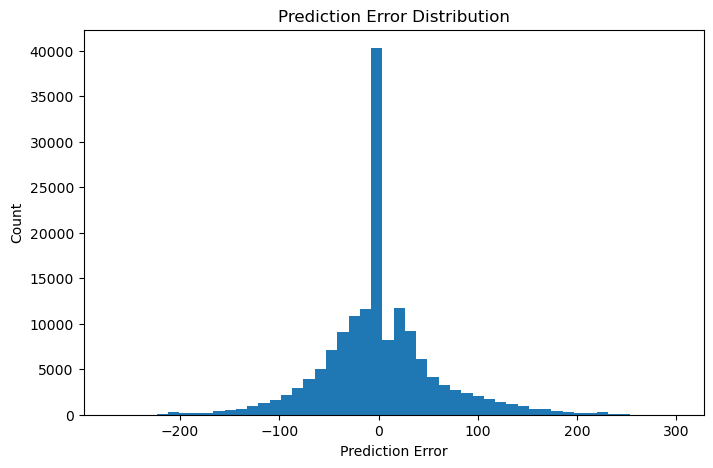

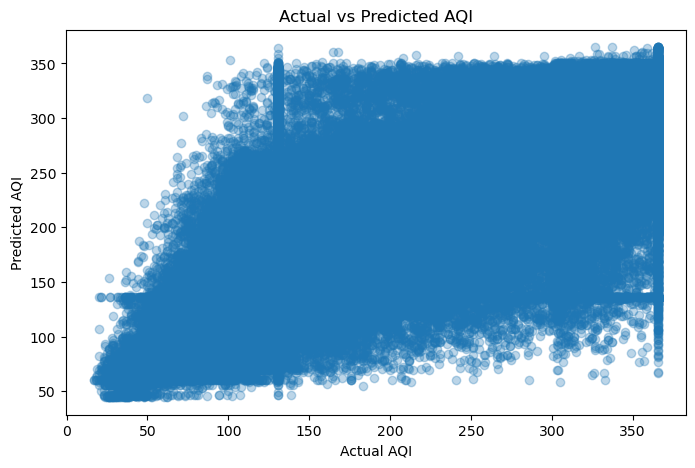

In [3]:
# ============================================
#     FULL AQI MODEL EVALUATION PIPELINE
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
    explained_variance_score,
    confusion_matrix
)

# -------------------------------
# 1. Generate Predictions
# -------------------------------
y_pred = aqi_pipeline.predict(X_test)

# -------------------------------
# 2. Regression Metrics Table
# -------------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
expl_var = explained_variance_score(y_test, y_pred)

metrics_table = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R² Score", "MAPE", "Explained Variance"],
    "Value": [mae, mse, rmse, r2, mape, expl_var]
})

print("\n📌 Regression Metrics Table")
print(metrics_table)

# -------------------------------
# 3. Feature Importance Table
# -------------------------------
importances = aqi_pipeline.named_steps['regressor'].feature_importances_

feature_importance_table = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\n📌 Feature Importance Table")
print(feature_importance_table)

# -------------------------------
# 4. Correlation Matrix
# -------------------------------
corr_matrix = station_hours[features + ['AQI']].corr()

print("\n📌 Correlation Matrix (Features + AQI)")
print(corr_matrix)

# -------------------------------
# 5. Residuals Table
# -------------------------------
residuals_table = pd.DataFrame({
    "Actual AQI": y_test.values,
    "Predicted AQI": y_pred,
    "Residual (Error)": y_test.values - y_pred
})

print("\n📌 Residuals Table (First 20 Rows)")
print(residuals_table.head(20))

# -------------------------------
# 6. Predicted vs Actual Table
# -------------------------------
pred_vs_actual_table = pd.DataFrame({
    "Actual AQI": y_test.values,
    "Predicted AQI": y_pred
})

print("\n📌 Predicted vs Actual Table (First 20 Rows)")
print(pred_vs_actual_table.head(20))

# -------------------------------
# 7. Error Percentile Table
# -------------------------------
absolute_errors = np.abs(y_test.values - y_pred)

percentile_table = pd.DataFrame({
    "Percentile": ["10%", "25%", "50%", "75%", "90%", "95%"],
    "Absolute Error": [
        np.percentile(absolute_errors, 10),
        np.percentile(absolute_errors, 25),
        np.percentile(absolute_errors, 50),
        np.percentile(absolute_errors, 75),
        np.percentile(absolute_errors, 90),
        np.percentile(absolute_errors, 95)
    ]
})

print("\n📌 Error Percentile Table")
print(percentile_table)

# -------------------------------
# 8. Convert AQI → Category
# -------------------------------
def aqi_to_category(aqi):
    if aqi <= 50: return "Good"
    elif aqi <= 100: return "Moderate"
    elif aqi <= 150: return "Unhealthy for Sensitive"
    elif aqi <= 200: return "Unhealthy"
    elif aqi <= 300: return "Very Unhealthy"
    else: return "Hazardous"

y_test_cat = y_test.apply(aqi_to_category)
y_pred_cat = pd.Series(y_pred).apply(aqi_to_category)

# -------------------------------
# 9. Confusion Matrix (AQI Categories)
# -------------------------------
labels = ["Good", "Moderate", "Unhealthy for Sensitive", "Unhealthy", "Very Unhealthy", "Hazardous"]

cm = confusion_matrix(y_test_cat, y_pred_cat, labels=labels)

confusion_matrix_table = pd.DataFrame(cm, index=labels, columns=labels)

print("\n📌 Confusion Matrix (AQI Categories)")
print(confusion_matrix_table)

# -------------------------------
# 10. Optional Plots
# -------------------------------

# Error Distribution Plot
plt.figure(figsize=(8,5))
plt.hist(y_test - y_pred, bins=50)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Prediction Error Distribution")
plt.show()

# Actual vs Predicted Scatter Plot
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()


In [6]:
import requests
import json

# --- Configuration ---
# Your deployed API base URL
API_URL = "https://aqi-api-rfpk.onrender.com"
PREDICT_ENDPOINT = "/predict"

# API Key Placeholder (Uncomment and set if authentication is enabled)
# API_KEY = "YOUR_SECRET_API_KEY" # Replace with your actual key

# Data to send (Example values for moderate pollution)
# Fields must match: PM2_5, PM10, SO2, O3, NO2, CO
INPUT_DATA = {
    "PM2_5": 80.5,
    "PM10": 120.0,
    "SO2": 15.2,
    "O3": 45.1,
    "NO2": 30.0,
    "CO": 0.8
}

# --- Request Setup ---
url = API_URL + PREDICT_ENDPOINT

# Headers for the request
headers = {
    "Content-Type": "application/json",
    # If using an API key, uncomment and adjust this line:
    # "Authorization": f"Bearer {API_KEY}" 
}

print(f"Sending POST request to: {url}")
print(f"Input Data: {INPUT_DATA}\n")

try:
    # Send the POST request
    response = requests.post(url, headers=headers, json=INPUT_DATA, timeout=15)
    
    # --- Response Handling ---
    
    # Check if the request was successful
    if response.status_code == 200:
        print("✅ Request Successful (Status 200)")
        
        # Parse and print the JSON response
        result = response.json()
        print(json.dumps(result, indent=4))
        
        print(f"\nPredicted AQI: {result.get('predicted_aqi')}")
        
    else:
        # Handle errors (e.g., 404, 422 validation, 500 server error)
        print(f"❌ Request Failed. Status Code: {response.status_code}")
        print("Response Body:")
        try:
            print(json.dumps(response.json(), indent=4))
        except json.JSONDecodeError:
            print(response.text)
            
except requests.exceptions.RequestException as e:
    print(f"An error occurred during the request: {e}")

Sending POST request to: https://aqi-api-rfpk.onrender.com/predict
Input Data: {'PM2_5': 80.5, 'PM10': 120.0, 'SO2': 15.2, 'O3': 45.1, 'NO2': 30.0, 'CO': 0.8}

An error occurred during the request: HTTPSConnectionPool(host='aqi-api-rfpk.onrender.com', port=443): Read timed out. (read timeout=15)
